# NBA Data Analysis with Deep Learning

## Overview
This project aims to analyze NBA player statistics using deep learning techniques. The data used in this project includes various performance metrics of NBA players such as points scored, assists, rebounds, field goal percentages, and more. The project applies data cleaning, aggregation, and statistical analysis techniques to derive meaningful insights from the dataset.

## Project Structure
This repository consists of a Jupyter notebook which follows a structured pipeline:

1. **Data Cleaning**: Preprocessing of raw NBA player statistics data.

## Notebook Details
### 1. Data Import and Cleaning:
- The raw data is loaded and cleaned using pandas.
- Players' statistics such as points, assists, field goals, and more are extracted from the dataset.

In [ ]:
!pip install pandas numpy matplotlib tensorflow scikit-learn seaborn

In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
stats_data = pd.read_csv('/content/database_24_25.csv')  # replace with the actual file path
salary_data = pd.read_csv('/content/Nba Player Salaries.csv')  # replace with the actual file path

# Show first few rows to inspect the datasets
print(stats_data.head())
print(salary_data.head())

          Player   Tm  Opp Res     MP  FG  FGA    FG%  3P  3PA  ...  DRB  TRB  \
0   Jayson Tatum  BOS  NYK   W  30.30  14   18  0.778   8   11  ...    4    4   
1  Anthony Davis  LAL  MIN   W  37.58  11   23  0.478   1    3  ...   13   16   
2  Derrick White  BOS  NYK   W  26.63   8   13  0.615   6   10  ...    3    3   
3   Jrue Holiday  BOS  NYK   W  30.52   7    9  0.778   4    6  ...    2    4   
4  Miles McBride  NYK  BOS   L  25.85   8   10  0.800   4    5  ...    0    0   

   AST  STL  BLK  TOV  PF  PTS  GmSc        Data  
0   10    1    1    1   1   37  38.1  2024-10-22  
1    4    1    3    1   1   36  34.0  2024-10-22  
2    4    1    0    0   1   24  22.4  2024-10-22  
3    4    1    0    0   2   18  19.5  2024-10-22  
4    2    0    0    1   1   22  17.8  2024-10-22  

[5 rows x 25 columns]
   Player Id        Player Name     2022/2023     2023/2024     2024/2025  \
0          1      Stephen Curry  $48,070,014   $51,915,615   $55,761,217    
1          2          John Wal

In [ ]:
# Print rows and columns for each DataFrame
print(f"Stats Data: {stats_data.shape[0]} rows, {stats_data.shape[1]} columns")
print(f"Salary Data: {salary_data.shape[0]} rows, {salary_data.shape[1]} columns")

Stats Data: 16512 rows, 25 columns
Salary Data: 574 rows, 6 columns


### 2. Data Aggregation:
- The data is grouped by players, and metrics like total points scored, assists, turnovers, and field goals are summed up.
- Additional columns are created to represent average statistics per game for players, which are derived from the aggregated stats.


In [ ]:
# 1. Clean the Stats Data
# Drop the 'Data' column as we don't need it for the analysis
stats_data_cleaned = stats_data.drop(columns=['Data'])

# Convert 'Res' (win/loss) column to numeric (W = 1, L = 0)
stats_data_cleaned['Res'] = stats_data_cleaned['Res'].map({'W': 1, 'L': 0})

# 2. Count the number of games played by each player
game_count = stats_data_cleaned.groupby('Player').size().reset_index(name='Games Played')

# 3. Aggregate the stats for each player (summed for cumulative stats, averaged for percentage stats)
aggregated_stats = stats_data_cleaned.groupby('Player').agg({
    'PTS': 'sum',   # Total points scored (sum)
    'AST': 'sum',   # Total assists (sum)
    'TRB': 'sum',   # Total rebounds (sum)
    'FG%': 'mean',  # Average field goal percentage (mean)
    '3P': 'sum',    # Total 3-pointers made (sum)
    '3PA': 'sum',   # Total 3-point attempts (sum)
    'TOV': 'sum',   # Total turnovers (sum)
    'STL': 'sum',   # Total steals (sum)
    'BLK': 'sum',   # Total blocks (sum)
    'Tm': 'first',  # Keep the team information (could be aggregated too)
    'Opp': lambda x: ', '.join(x.unique()),  # Aggregate opponent teams (comma-separated)
    'MP': 'sum',    # Total minutes played (sum)
    'FG': 'sum',    # Total field goals made (sum)
    'FGA': 'sum',   # Total field goals attempted (sum)
    '3P%': 'mean',  # Average 3-point percentage (mean)
    'FT': 'sum',    # Total free throws made (sum)
    'FTA': 'sum',   # Total free throws attempted (sum)
    'FT%': 'mean',  # Average free throw percentage (mean)
    'ORB': 'sum',   # Total offensive rebounds (sum)
    'DRB': 'sum',   # Total defensive rebounds (sum)
    'PF': 'sum',    # Total personal fouls (sum)
    'GmSc': 'sum'   # Total Game Score (GmSc) (sum)
}).reset_index()

# 4. Merge the game count with aggregated stats to get the number of games played
aggregated_stats = pd.merge(aggregated_stats, game_count, on='Player', how='left')

# 5. Calculate the **average per game** for relevant cumulative stats (divide by number of games)
aggregated_stats['PTS_per_game'] = aggregated_stats['PTS'] / aggregated_stats['Games Played']
aggregated_stats['AST_per_game'] = aggregated_stats['AST'] / aggregated_stats['Games Played']
aggregated_stats['TRB_per_game'] = aggregated_stats['TRB'] / aggregated_stats['Games Played']
aggregated_stats['MP_per_game'] = aggregated_stats['MP'] / aggregated_stats['Games Played']
aggregated_stats['FG_per_game'] = aggregated_stats['FG'] / aggregated_stats['Games Played']
aggregated_stats['FGA_per_game'] = aggregated_stats['FGA'] / aggregated_stats['Games Played']
aggregated_stats['3P_per_game'] = aggregated_stats['3P'] / aggregated_stats['Games Played']
aggregated_stats['FT_per_game'] = aggregated_stats['FT'] / aggregated_stats['Games Played']
aggregated_stats['ORB_per_game'] = aggregated_stats['ORB'] / aggregated_stats['Games Played']
aggregated_stats['DRB_per_game'] = aggregated_stats['DRB'] / aggregated_stats['Games Played']
aggregated_stats['PF_per_game'] = aggregated_stats['PF'] / aggregated_stats['Games Played']
aggregated_stats['3PA_per_game'] = aggregated_stats['3PA'] / aggregated_stats['Games Played']
aggregated_stats['TOV_per_game'] = aggregated_stats['TOV'] / aggregated_stats['Games Played']
aggregated_stats['STL_per_game'] = aggregated_stats['STL'] / aggregated_stats['Games Played']
aggregated_stats['BLK_per_game'] = aggregated_stats['BLK'] / aggregated_stats['Games Played']
aggregated_stats['FTA_per_game'] = aggregated_stats['FTA'] / aggregated_stats['Games Played']
aggregated_stats['FT%_per_game'] = aggregated_stats['FT%'] / aggregated_stats['Games Played']
aggregated_stats['FG%_per_game'] = aggregated_stats['FG%'] / aggregated_stats['Games Played']  # Corrected for FG%
aggregated_stats['3P%_per_game'] = aggregated_stats['3P%'] / aggregated_stats['Games Played']  # Corrected for 3P%

# **Important Update for GmSc**: Calculate average Game Score per game
aggregated_stats['GmSc_per_game'] = aggregated_stats['GmSc'] / aggregated_stats['Games Played']

# 6. Count the number of Wins (W Res) and Losses (L Res) for each player
win_loss_count = stats_data_cleaned.groupby('Player')['Res'].agg(
    W_Res='sum',  # Count the number of wins
    L_Res=lambda x: (x == 0).sum()  # Count the number of losses (Res == 0)
).reset_index()

# 7. Merge win/loss counts back to the aggregated stats
aggregated_stats = pd.merge(aggregated_stats, win_loss_count, on='Player', how='left')

# 8. Clean and Merge with Salary Data
# We will clean the salary data and only keep the player name and their salary for 2024/2025
salary_data_cleaned = salary_data[['Player Name', '2024/2025']]

# Clean the salary values by removing $ and commas
salary_data_cleaned['2024/2025'] = salary_data_cleaned['2024/2025'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Merge the aggregated stats with salary data based on player name
merged_data = pd.merge(aggregated_stats, salary_data_cleaned, left_on='Player', right_on='Player Name', how='inner')

# 9. Filter out players with 0 salary (these players did not participate in the 2024/2025 season)
merged_data = merged_data[merged_data['2024/2025'] > 0]

# Drop the redundant 'Player Name' column after the merge
merged_data = merged_data.drop(columns=['Player Name'])

# 10. Rename the salary column to '2024/2025 Salaries' and reset the index to start from 1
merged_data.rename(columns={'2024/2025': '2024/2025 Salaries'}, inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data.index += 1  # Adjusting index to start from 1

# 11. Drop the original stat columns and keep only the 'per game' stats
columns_to_drop = ['PTS', 'AST', 'TRB', 'FG%', '3P', '3PA', 'TOV', 'STL', 'BLK', 'MP', 'FG', 'FGA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'PF', 'GmSc']
merged_data = merged_data.drop(columns=columns_to_drop)

# 12. Save the final cleaned dataset for participating players
merged_data.to_csv('/content/participating_players_cleaned.csv', index=False)

# Display the final cleaned dataset
merged_data.head()

<ipython-input-5-388a14ba412c>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data_cleaned['2024/2025'] = salary_data_cleaned['2024/2025'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,Player,Tm,Opp,Games Played,PTS_per_game,AST_per_game,TRB_per_game,MP_per_game,FG_per_game,FGA_per_game,...,STL_per_game,BLK_per_game,FTA_per_game,FT%_per_game,FG%_per_game,3P%_per_game,GmSc_per_game,W_Res,L_Res,2024/2025 Salaries
1,Aaron Gordon,DEN,"OKC, LAC, TOR, BRK, MIN, UTA, GSW, CLE, ATL, S...",30,12.333333,3.066667,4.733333,26.666000,4.333333,8.500000,...,0.466667,0.266667,3.233333,0.021023,0.017030,0.013367,10.696667,20,10,22841455.0
2,Aaron Nesmith,IND,"DET, NYK, PHI, ORL, BOS, NOP, SAS, ATL, UTA, P...",15,8.200000,1.266667,3.333333,20.949333,2.733333,5.533333,...,0.600000,0.266667,1.933333,0.037631,0.031898,0.026222,6.426667,9,6,7837251.0
3,Aaron Wiggins,OKC,"DEN, CHI, ATL, SAS, POR, LAC, ORL, HOU, GSW, N...",51,10.137255,1.568627,3.568627,21.322745,4.019608,8.117647,...,0.725490,0.235294,0.901961,0.005238,0.009322,0.006666,8.172549,41,10,1988598.0
4,Al Horford,BOS,"NYK, WAS, DET, MIL, IND, CHO, ATL, GSW, BRK, T...",40,7.850000,1.925000,5.250000,26.203250,2.875000,7.050000,...,0.600000,0.850000,0.400000,0.005000,0.009837,0.008075,7.297500,27,13,9500000.0
5,Alex Caruso,OKC,"DEN, CHI, ATL, SAS, POR, LAC, ORL, HOU, GSW, T...",31,5.548387,2.419355,2.774194,19.188387,2.129032,5.483871,...,1.806452,0.483871,0.451613,0.005723,0.011412,0.008477,6.032258,24,7,9890000.0


In [ ]:
# Let's load the saved CSV and check the number of rows and columns in the dataset
import pandas as pd

# Load the final cleaned dataset
final_data = pd.read_csv('/content/participating_players_cleaned.csv')

# Get the number of rows and columns
num_rows, num_cols = final_data.shape

num_rows, num_cols  # Display the number of rows and columns in the dataset

(191, 27)

### 3. Statistical Analysis:
- The number of games played by each player is calculated.
- Average statistics per game are computed and included in the dataset.

AND

### 4. Visualization:
- Visual representations (graphs and charts) are created to analyze player performances, compare stats, and detect trends.

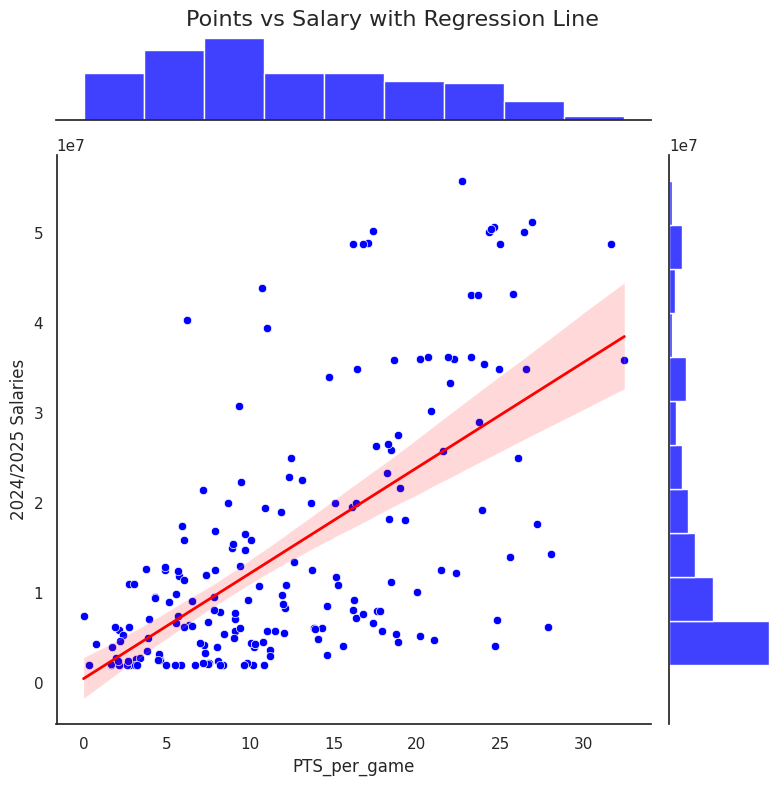

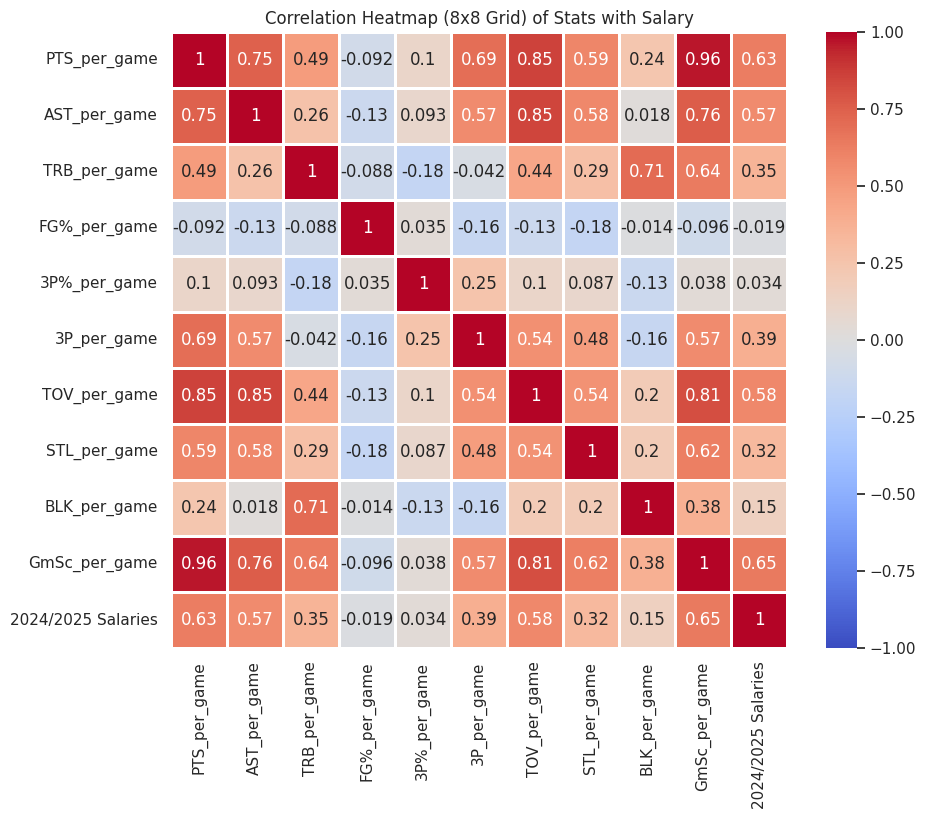

<ipython-input-46-e8e7586c14b6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GmSc_per_game', y='Player', data=top_10_players_gmsc, palette="Blues_d")


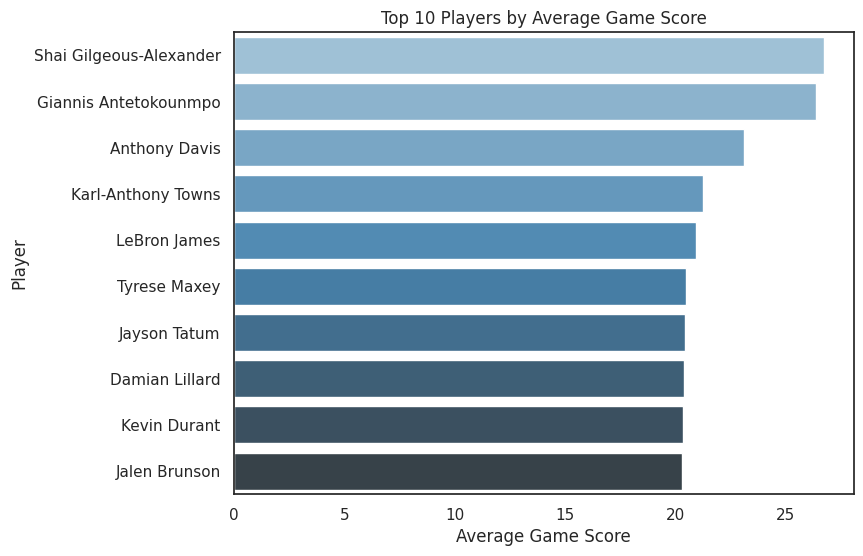

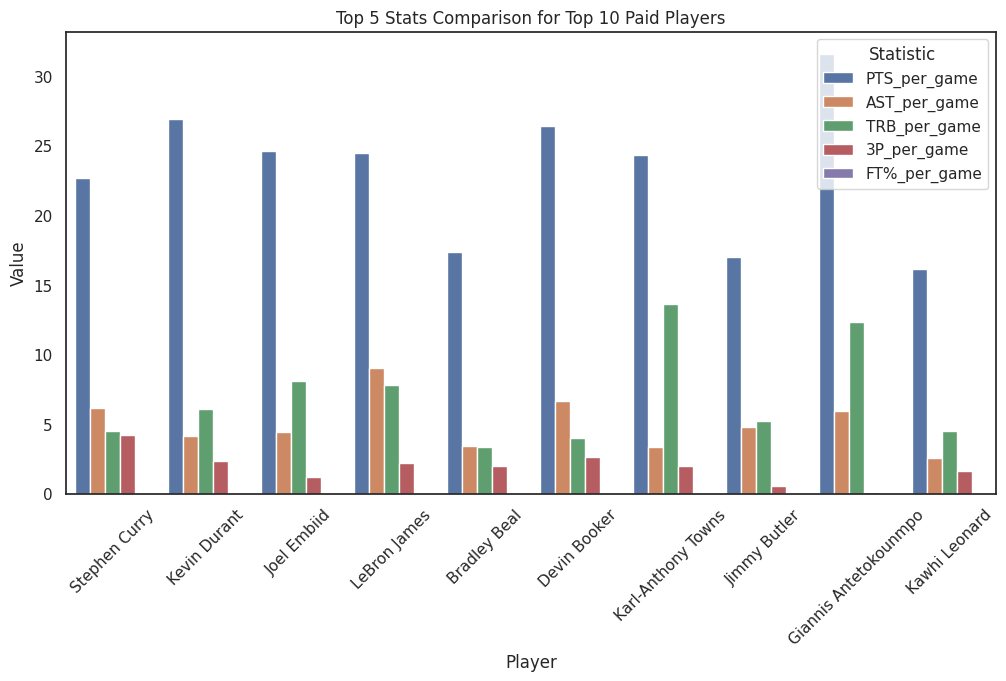

<ipython-input-46-e8e7586c14b6>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='2024/2025 Salaries', data=top_5_paid_players, palette="Blues_d")


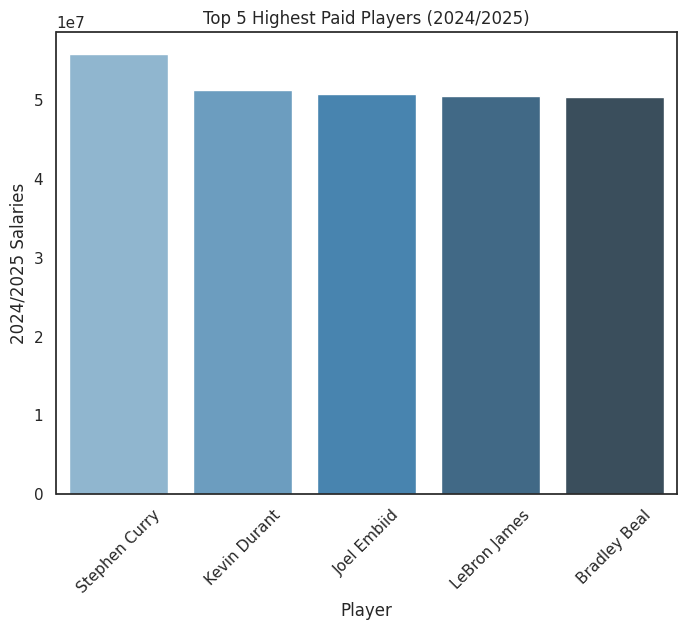

<ipython-input-46-e8e7586c14b6>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tm', y='2024/2025 Salaries', data=avg_salary_by_team, palette="viridis")


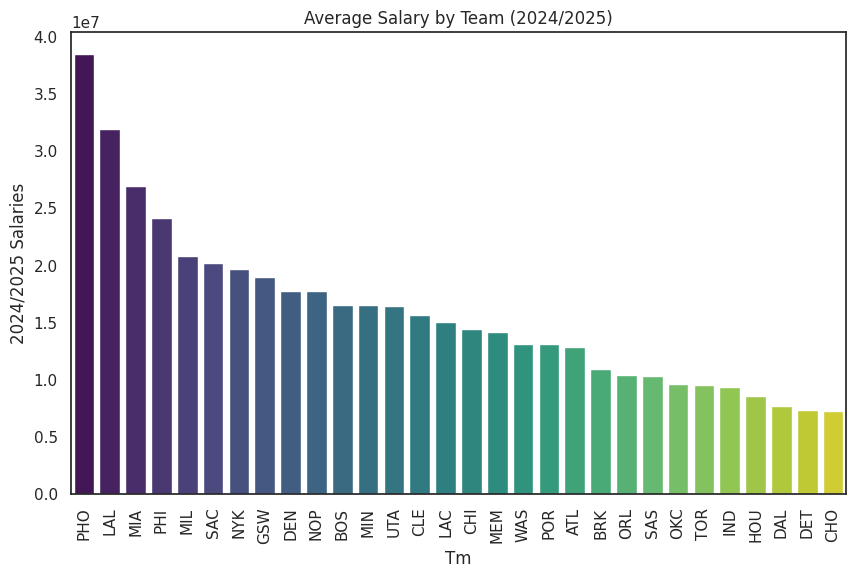

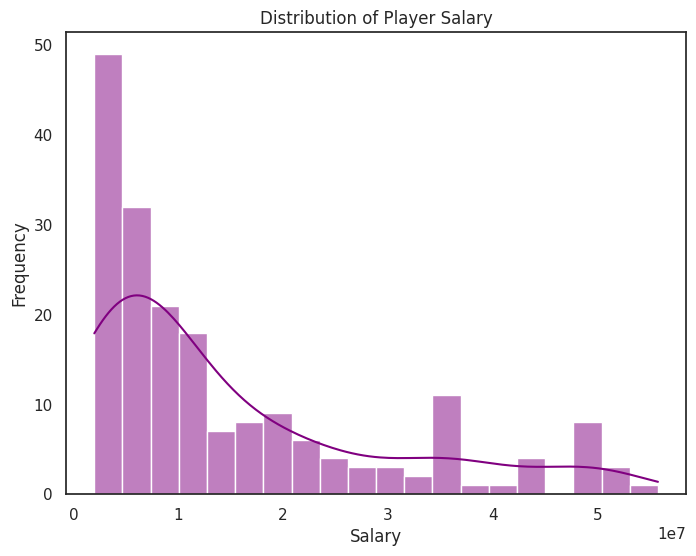

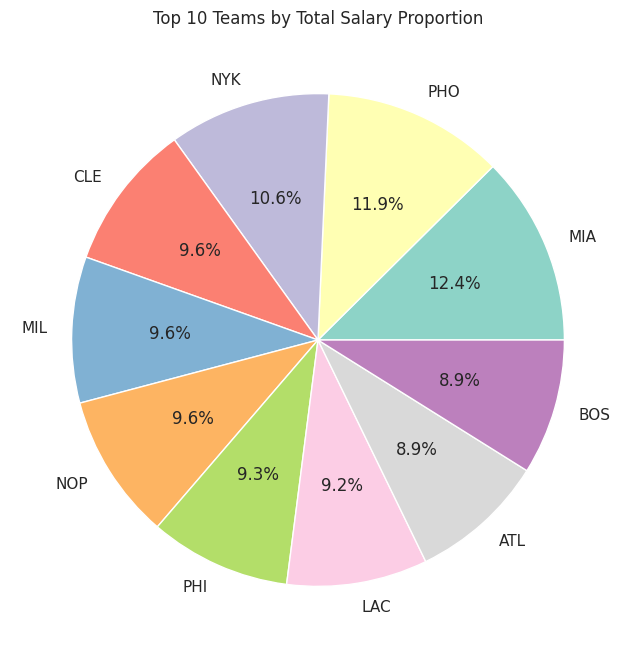

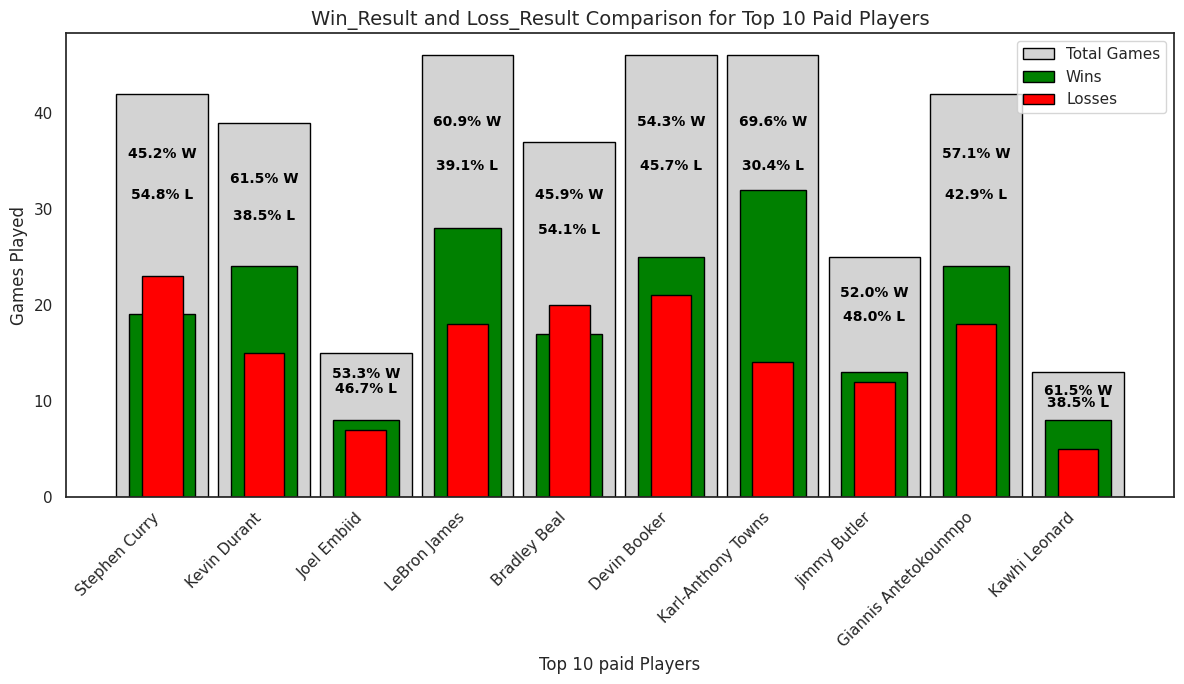

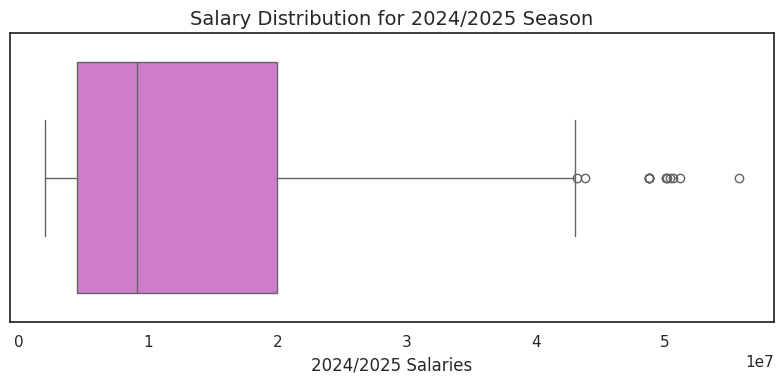

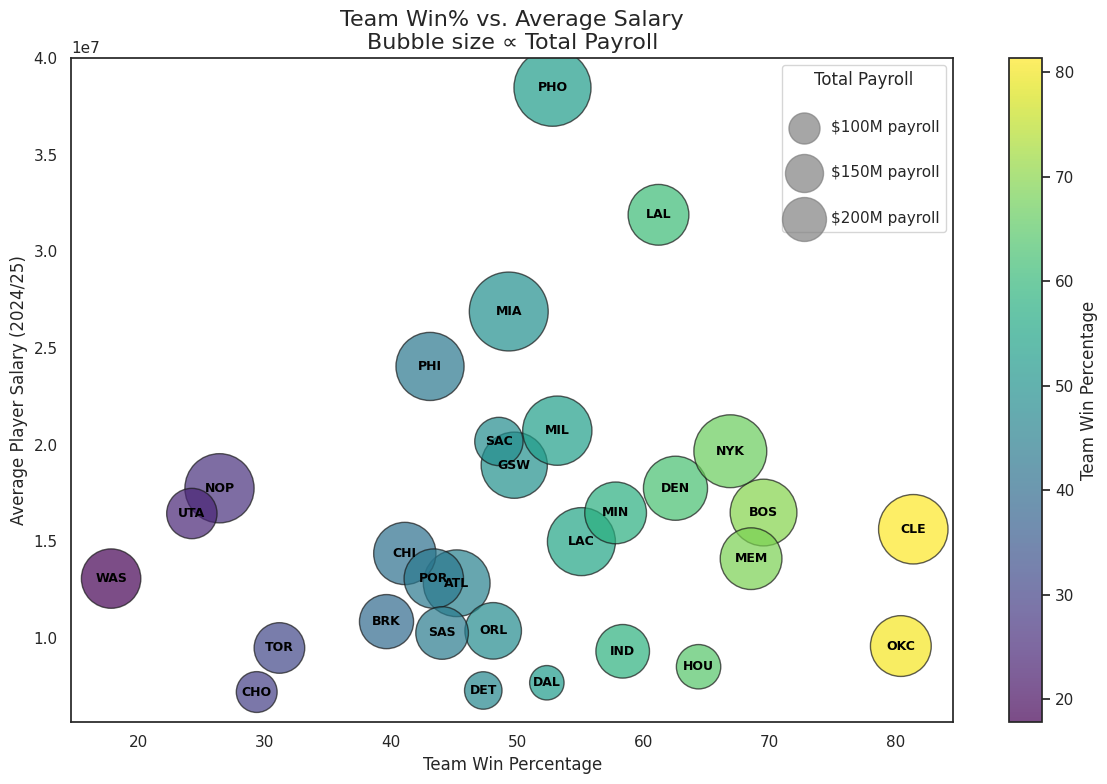

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. **PTS vs Salary - Joint Plot**
# Create the combined plot with histograms and scatter plot (without grids)
sns.set(style="white")
# Create a 2x2 grid for the scatter plot and histograms
g = sns.jointplot(data=merged_data, x='PTS_per_game', y='2024/2025 Salaries', kind='scatter', height=8, color='blue')
# Add regression line with confidence interval (shaded area)
sns.regplot(x='PTS_per_game', y='2024/2025 Salaries', data=merged_data, scatter=False, ax=g.ax_joint, color='red', line_kws={"color": "red", "lw": 2})
g.ax_joint.grid(False)  # Remove gridlines from the scatter plot
g.ax_marg_x.grid(False)  # Remove gridlines from the top histogram
g.ax_marg_y.grid(False)  # Remove gridlines from the right histogram
g.fig.suptitle("Points vs Salary with Regression Line", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
plt.show()

# 2. **Heatmap of Top 8 Correlated Stats with Salary (8x8 Grid)**
correlation_matrix = merged_data[['PTS_per_game', 'AST_per_game', 'TRB_per_game', 'FG%_per_game', '3P%_per_game', '3P_per_game', 'TOV_per_game', 'STL_per_game', 'BLK_per_game', 'GmSc_per_game', '2024/2025 Salaries']].corr()
# Reshaping to display in an 8x8 heatmap grid
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=1, linecolor='white')
plt.title("Correlation Heatmap (8x8 Grid) of Stats with Salary")
plt.show()

# 3. **Top 10 Players by Average Game Score - Horizontal Bar Plot**
top_10_players_gmsc = merged_data[['Player', 'GmSc_per_game']].sort_values(by='GmSc_per_game', ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x='GmSc_per_game', y='Player', data=top_10_players_gmsc, palette="Blues_d")
plt.title("Top 10 Players by Average Game Score")
plt.xlabel("Average Game Score")
plt.ylabel("Player")
plt.show()

# 4. **Top 5 Stats Comparison for Top 10 Paid Players in Descending Order**
top_10_paid_players = merged_data[['Player', '2024/2025 Salaries', 'PTS_per_game', 'AST_per_game', 'TRB_per_game', '3P_per_game', 'FT%_per_game']].sort_values(by='2024/2025 Salaries', ascending=False).head(10)

# Prepare data for bar plot
top_10_paid_players_melted = top_10_paid_players.melt(id_vars=['Player', '2024/2025 Salaries'], value_vars=['PTS_per_game', 'AST_per_game', 'TRB_per_game', '3P_per_game', 'FT%_per_game'],
                                                     var_name='Statistic', value_name='Value')
plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Value', hue='Statistic', data=top_10_paid_players_melted)
plt.title('Top 5 Stats Comparison for Top 10 Paid Players')
plt.xticks(rotation=45)
plt.show()

# 5. **Top 5 Highest Paid Players of Season 2024/2025 in Descending Order**
top_5_paid_players = merged_data[['Player', '2024/2025 Salaries']].sort_values(by='2024/2025 Salaries', ascending=False).head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='2024/2025 Salaries', data=top_5_paid_players, palette="Blues_d")
plt.title("Top 5 Highest Paid Players (2024/2025)")
plt.xticks(rotation=45)
plt.show()

# 6. **Average Salary by Team in Descending Order**
avg_salary_by_team = merged_data.groupby('Tm')['2024/2025 Salaries'].mean().reset_index()
avg_salary_by_team = avg_salary_by_team.sort_values(by='2024/2025 Salaries', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Tm', y='2024/2025 Salaries', data=avg_salary_by_team, palette="viridis")
plt.title("Average Salary by Team (2024/2025)")
plt.xticks(rotation=90)
plt.show()

# 7. **Distribution of Player Salary Analysis (Bar and Line Plot)**
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['2024/2025 Salaries'], kde=True, color='purple', bins=20)
plt.title("Distribution of Player Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# 8. **Pie Chart for Top 10 Teams by Total Salary Proportion**
team_salary_proportion = merged_data.groupby('Tm')['2024/2025 Salaries'].sum().reset_index()
team_salary_proportion = team_salary_proportion.sort_values(by='2024/2025 Salaries', ascending=False).head(10)
team_salary_proportion['Proportion'] = (team_salary_proportion['2024/2025 Salaries'] / team_salary_proportion['2024/2025 Salaries'].sum()) * 100
plt.figure(figsize=(8, 8))
plt.pie(team_salary_proportion['Proportion'], labels=team_salary_proportion['Tm'], autopct='%1.1f%%', colors=sns.color_palette("Set3", len(team_salary_proportion)))
plt.title("Top 10 Teams by Total Salary Proportion")
plt.show()

# 9. **W_Res and L_Res Comparison for Top 10 Paid Players (Nested Bar Chart)**
# Prepare the data: top 10 players by salary for comparison
top_10_paid_players_win_loss = merged_data[['Player', '2024/2025 Salaries', 'Games Played', 'W_Res', 'L_Res']].sort_values(by='2024/2025 Salaries', ascending=False).head(10)
# Calculate Win percentage and Loss percentage
top_10_paid_players_win_loss['W%'] = (top_10_paid_players_win_loss['W_Res'] / top_10_paid_players_win_loss['Games Played']) * 100
top_10_paid_players_win_loss['L%'] = (top_10_paid_players_win_loss['L_Res'] / top_10_paid_players_win_loss['Games Played']) * 100
# Plotting the vertical bar chart for W_Res and L_Res (bar-in-bar)
plt.figure(figsize=(12, 7))
# Plot the outer bar (Total Games) in light gray
plt.bar(top_10_paid_players_win_loss['Player'], top_10_paid_players_win_loss['Games Played'],
        color='lightgray', edgecolor='black', label='Total Games', width=0.9)
# Plot the inner green bar (Wins) inside the total games bars (smaller)
plt.bar(top_10_paid_players_win_loss['Player'], top_10_paid_players_win_loss['W_Res'],
        color='green', edgecolor='black', label='Wins', width=0.65)
# Plot the inner red bar (Losses) inside the wins bars (even smaller)
plt.bar(top_10_paid_players_win_loss['Player'], top_10_paid_players_win_loss['L_Res'],
        color='red', edgecolor='black', label='Losses', width=0.4)
# Add the win and loss percentages inside the gray (Total Games) bar
for i in range(len(top_10_paid_players_win_loss)):
    win_percentage = top_10_paid_players_win_loss['W%'].iloc[i]
    loss_percentage = top_10_paid_players_win_loss['L%'].iloc[i]
    # Position the win percentage inside the gray bar (closer to top)
    plt.text(top_10_paid_players_win_loss['Player'].iloc[i],
             top_10_paid_players_win_loss['Games Played'].iloc[i] * 0.85,  # Closer to the top
             f"{win_percentage:.1f}% W",
             va='center', ha='center', color='black', fontweight='bold', fontsize=10)
       # Position the loss percentage inside the gray bar (closer to bottom, below win percentage)
    plt.text(top_10_paid_players_win_loss['Player'].iloc[i],
             top_10_paid_players_win_loss['Games Played'].iloc[i] * 0.75,  # Below the win percentage
             f"{loss_percentage:.1f}% L",
             va='center', ha='center', color='black', fontweight='bold', fontsize=10)
# Add title and labels
plt.title("Win_Result and Loss_Result Comparison for Top 10 Paid Players", fontsize=14)
plt.ylabel("Games Played")
plt.xlabel("Top 10 paid Players")
# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

# 10. **Box plot for the Salary Distribution**
plt.figure(figsize=(8, 4))
sns.boxplot(x=merged_data['2024/2025 Salaries'], color='orchid')
plt.title("Salary Distribution for 2024/2025 Season", fontsize=14)
plt.xlabel("2024/2025 Salaries", fontsize=12)
plt.tight_layout()
plt.show()

# 11. **Bubble Chart to calculate the team win percentage and average salary**
# Prepare team‐level data
team_performance = (    merged_data
    .groupby('Tm')
    .agg(
        Games_Played=('Games Played','sum'),
        Total_Payroll=('2024/2025 Salaries','sum'),
        Avg_Salary=('2024/2025 Salaries','mean'),
        Wins=('W_Res','sum')
    )
    .reset_index()
)
team_performance['Win%'] = team_performance['Wins'] / team_performance['Games_Played'] * 100
# Normalize payroll sizes for plotting
# (so bubbles aren’t enormous but roughly proportional)
team_performance['Payroll_Size'] = team_performance['Total_Payroll'] / 1e6  # in millions
plt.figure(figsize=(12,8))
bubble = plt.scatter(
    x=team_performance['Win%'],
    y=team_performance['Avg_Salary'],
    s=team_performance['Payroll_Size'] * 20,     # scale factor for bubble size
    c=team_performance['Win%'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)
# Annotate team names
for _, row in team_performance.iterrows():
    plt.text(
        row['Win%'], row['Avg_Salary'], row['Tm'],
        fontsize=9, weight='bold', ha='center', va='center',
        color='black'
    )
# Colorbar for Win%
cbar = plt.colorbar(bubble)
cbar.set_label('Team Win Percentage')
# Legend for bubble size (approx payroll)
# Picking a few representative payroll sizes:
for payroll in [100, 150, 200]:  # in millions
    plt.scatter([], [], s=payroll*5, c='gray', alpha=0.7,
                label=f'${payroll}M payroll')
plt.legend(scatterpoints=1, frameon=True, labelspacing=2, title="Total Payroll")
plt.title("Team Win% vs. Average Salary\nBubble size ∝ Total Payroll", fontsize=16)
plt.xlabel("Team Win Percentage", fontsize=12)
plt.ylabel("Average Player Salary (2024/25)", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

### 5. Final Output:
- The cleaned and aggregated dataset is saved for further analysis or use in machine learning models.

### Salary Forecasting

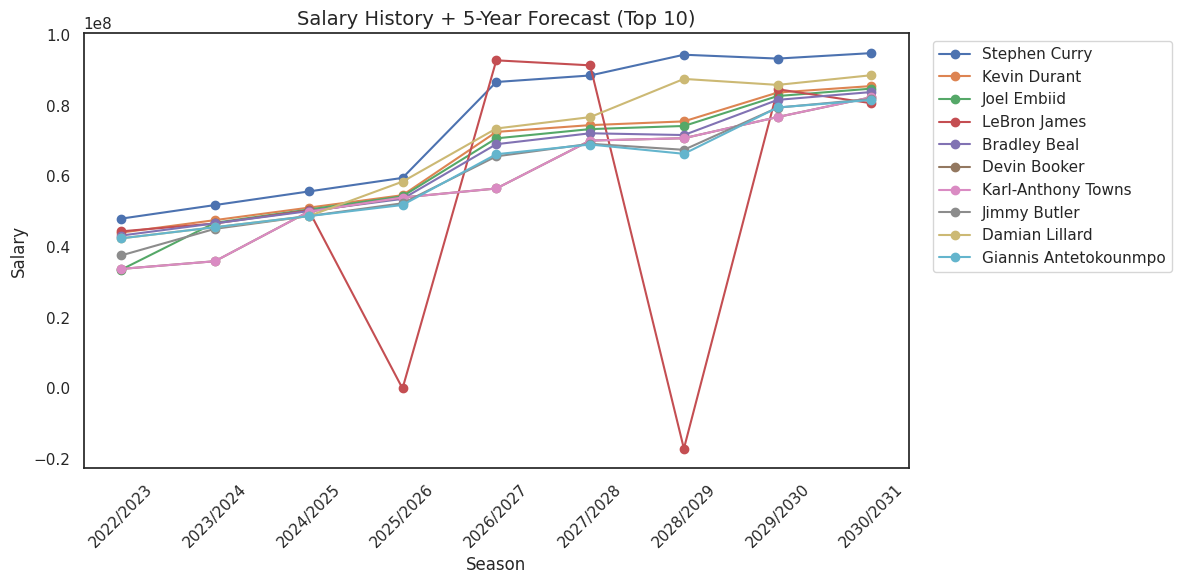

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1) Top-10 from stats
stats = pd.read_csv('/content/participating_players_cleaned.csv')
top10 = stats.nlargest(10, '2024/2025 Salaries')['Player'].tolist()

# 2) Load & clean salaries
sal = pd.read_csv('/content/Nba Player Salaries1.csv')
year_cols = ['2022/2023','2023/2024','2024/2025','2025/2026']
for col in year_cols:
    sal[col] = (sal[col]
                .astype(str)
                .str.replace(r'[\$,]', '', regex=True)
                .str.strip()
                .replace('', np.nan)
                .astype(float))

sal_top10 = (sal[sal['Player Name'].isin(top10)]
             .set_index('Player Name')[year_cols]
             .dropna())

# 3) Build 3→1 sequences
seq_len = 3
X, y = [], []
for player, row in sal_top10.iterrows():
    arr = row.values
    for i in range(len(arr)-seq_len):
        X.append(arr[i:i+seq_len])
        y.append(arr[i+seq_len])
X = np.array(X)
y = np.array(y)

# 4) Scale
scaler_X = MinMaxScaler(); Xs = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler(); ys = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

# 5) Split
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

# A) MLP
mlp = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# B) LSTM
X_seq = Xs.reshape((-1, seq_len, 1))
Xtr, Xte, ytr, yte = train_test_split(X_seq, ys, test_size=0.2, random_state=42)

lstm = Sequential([
    Input(shape=(seq_len,1)),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(16),
    Dropout(0.2),
    Dense(1)
])
lstm.compile('adam','mse')
lstm.fit(Xtr, ytr, validation_data=(Xte,yte), epochs=50, batch_size=4, verbose=0)

# 6) Forecast util
def forecast(model, last_win, steps, is_seq=False):
    seq = last_win.copy()
    preds = []
    for _ in range(steps):
        if is_seq:
            p = model.predict(seq.reshape(1,seq_len,1))[0,0]
        else:
            p = model.predict(seq.reshape(1,seq_len))[0]
        preds.append(p)
        seq = np.roll(seq, -1)
        seq[-1] = p
    return np.array(preds)

# last observed windows (use .values before reshape)
last_windows = {
    pl: scaler_X.transform(vals.values[-seq_len:].reshape(1,-1))[0]
    for pl, vals in sal_top10.iterrows()
}

# build forecast DataFrame
hist = year_cols
fut = ['2026/2027','2027/2028','2028/2029','2029/2030','2030/2031']
all_seasons = hist + fut
df_fore = pd.DataFrame(index=sal_top10.index, columns=all_seasons, dtype=float)
df_fore[hist] = sal_top10

# choose model
use_model, is_seq = mlp, False

for player in df_fore.index:
    lw = last_windows[player]
    raw = forecast(use_model, lw, steps=5, is_seq=is_seq)
    df_fore.loc[player, fut] = scaler_y.inverse_transform(raw.reshape(-1,1)).ravel()

# 7) Plot
plt.figure(figsize=(12,6))
for p in top10:
    plt.plot(all_seasons, df_fore.loc[p], marker='o', label=p)

plt.title("Salary History + 5-Year Forecast (Top 10)", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()


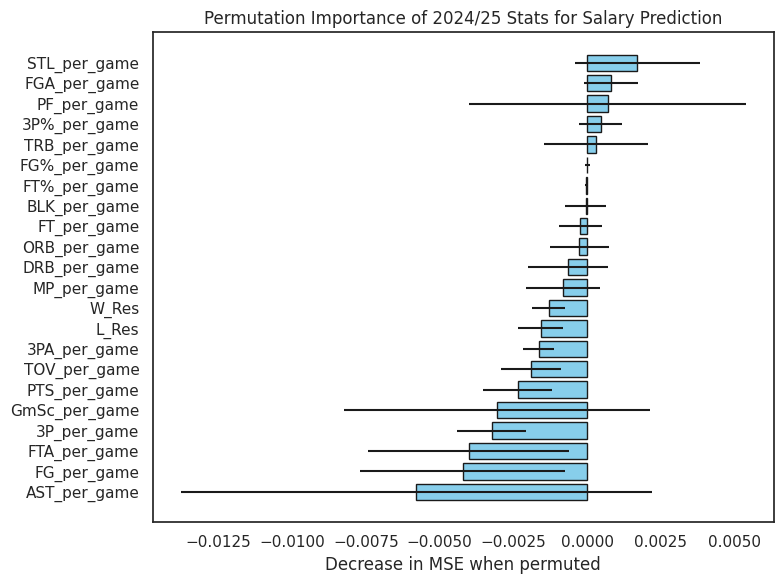

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance

# 1) Load & prepare features/target exactly as before
df = pd.read_csv('/content/participating_players_cleaned.csv')
feature_cols = [c for c in df.columns if c.endswith('_per_game') or c in ('W_Res','L_Res')]
X = df[feature_cols].values
y = df['2024/2025 Salaries'].values

scaler_X = MinMaxScaler(); X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler(); y_scaled = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# 2) Fit an MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(128,64),
                   activation='relu',
                   max_iter=500,
                   random_state=42)
mlp.fit(X_train, y_train)

# 3) Compute permutation importances on the test set
r = permutation_importance(
    mlp, X_test, y_test,
    n_repeats=20,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# 4) Aggregate and sort
imp_means = r.importances_mean
imp_std   = r.importances_std
indices   = np.argsort(imp_means)[::-1]

# 5) Plot
plt.figure(figsize=(8,6))
plt.barh(
    np.array(feature_cols)[indices],
    imp_means[indices],
    xerr=imp_std[indices],
    color='skyblue', edgecolor='k'
)
plt.xlabel("Decrease in MSE when permuted")
plt.title("Permutation Importance of 2024/25 Stats for Salary Prediction")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


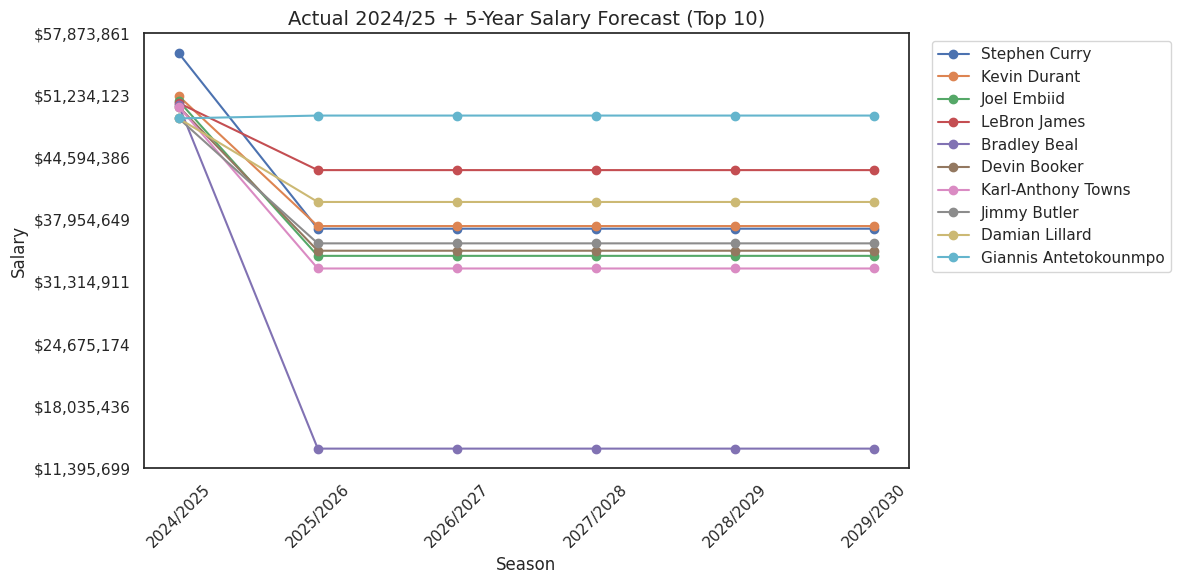

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.ticker as ticker

# 1) load the cleaned 2024/25 stats + salaries
df = pd.read_csv('/content/participating_players_cleaned.csv')

# 2) define our feature matrix X and target y
feature_cols = [c for c in df.columns if c.endswith('_per_game') or c in ('W_Res','L_Res')]
X = df[feature_cols].values
y = df['2024/2025 Salaries'].values

# 3) scale both
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

# 4) train/test split and fit MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)
mlp = MLPRegressor(hidden_layer_sizes=(128,64),
                   activation='relu',
                   max_iter=500,
                   random_state=42)
mlp.fit(X_train, y_train)

# 5) single–step prediction for each player, then repeat for 5 future seasons
base_pred_scaled = mlp.predict(X_scaled)
base_pred = scaler_y.inverse_transform(base_pred_scaled.reshape(-1,1)).ravel()

# build a DataFrame of actual + forecast
seasons = ['2024/2025','2025/2026','2026/2027','2027/2028','2028/2029','2029/2030']
forecast = np.column_stack([
    y,                          # actual 24/25
    np.tile(base_pred, (5,1)).T  # repeat the one‐step forecast 5 times
])
fc_df = pd.DataFrame(forecast, columns=seasons, index=df['Player'])

# 6) plot only the Top-10 earners in 2024/25
top10 = df.nlargest(10, '2024/2025 Salaries')['Player'].tolist()
plt.figure(figsize=(12,6))
ax = plt.gca()

for p in top10:
    ax.plot(seasons, fc_df.loc[p], marker='o', label=p)

# 7) add more y-axis intervals
ax.yaxis.set_major_locator(ticker.LinearLocator(8))   # 8 ticks
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# 8) labels, legend, style
plt.title("Actual 2024/25 + 5-Year Salary Forecast (Top 10)", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1) Load cleaned 2024/25 data
df = pd.read_csv('/content/participating_players_cleaned.csv')

# 2) Select top-5 most important features (from permutation importance)
features = [
    'AST_per_game',
    'FG_per_game',
    'FTA_per_game',
    '3P_per_game',
    'GmSc_per_game'
]
X = df[features].values
y = df['2024/2025 Salaries'].values

# 3) Scale features into [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4) Train/validation split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ───────────── Baseline: Linear Regression ─────────────
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_val)

rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mae_lr  = mean_absolute_error(y_val, y_pred_lr)
r2_lr   = r2_score(y_val, y_pred_lr)

print("Linear Regression Baseline:")
print(f"  RMSE = ${rmse_lr:,.0f}")
print(f"  MAE  = ${mae_lr:,.0f}")
print(f"  R²   = {r2_lr:.3f}\n")

# ───────────── Deep Learning: MLP ─────────────
tf.random.set_seed(42)
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

mlp.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

history = mlp.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    verbose=1
)

# 5) Evaluate MLP on validation set
y_pred_mlp = mlp.predict(X_val).ravel()

rmse_mlp = np.sqrt(mean_squared_error(y_val, y_pred_mlp))
mae_mlp  = mean_absolute_error(y_val, y_pred_mlp)
r2_mlp   = r2_score(y_val, y_pred_mlp)

print("MLP Performance:")
print(f"  RMSE = ${rmse_mlp:,.0f}")
print(f"  MAE  = ${mae_mlp:,.0f}")
print(f"  R²   = {r2_mlp:.3f}")

Linear Regression Baseline:
  RMSE = $12,653,930
  MAE  = $8,675,857
  R²   = 0.160



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 486613754839040.0000 - mae: 15898898.0000 - val_loss: 396170501292032.0000 - val_mae: 14334587.0000
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 486613754839040.0000 - mae: 15898898.0000 - val_loss: 396170501292032.0000 - val_mae: 14334587.0000
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 486613754839040.0000 - mae: 15898898.0000 - val_loss: 396170501292032.0000 - val_mae: 14334587.0000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 486613754839040.0000 - mae: 15898898.0000 - val_loss: 396170501292032.0000 - val_mae: 14334587.0000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 486613754839040.0000 - mae: 15898898.0000 - val_loss: 396170467737600.0000 - val_mae: 14334585.0000
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 486613754839040.0000 - mae: 15898898.0000 - val_loss: 396170467737600.0000 - val_mae: 14334585.0000
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4

### DL Models Comparison

Linear Regression on log(Salary):
  RMSE = $13,735,650
  MAE  = $9,642,135
  R²   = 0.011

MLP Regressor on log(Salary):
  RMSE = $14,647,620
  MAE  = $9,670,576
  R²   = -0.125



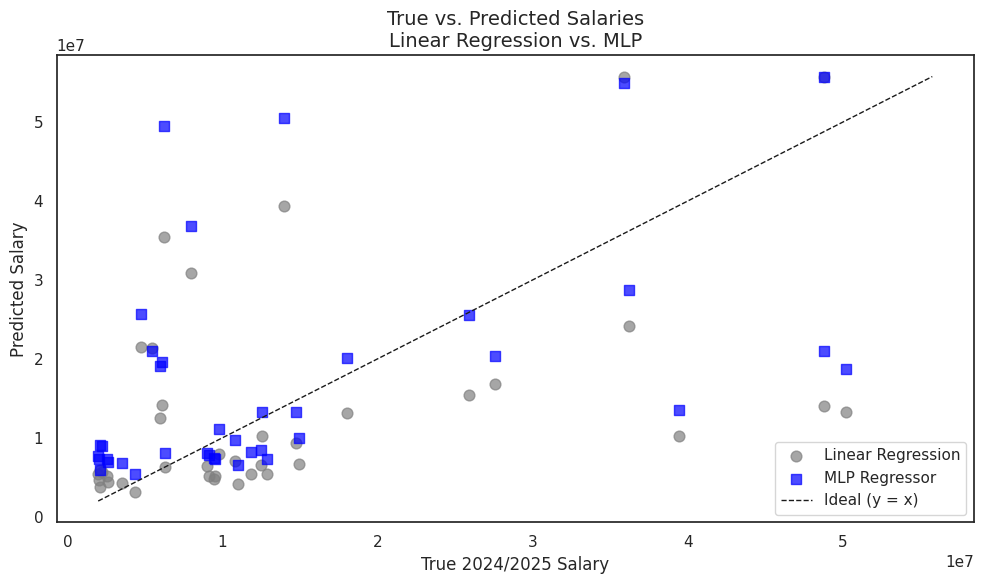

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

# 1) Load data
df = pd.read_csv('/content/participating_players_cleaned.csv')

# 2) Select top-5 stats as features
features = [
    'AST_per_game',
    'FG_per_game',
    'FTA_per_game',
    '3P_per_game',
    'GmSc_per_game'
]
X = df[features].values
y = df['2024/2025 Salaries'].values

# 3) Log-transform the target to stabilize scale
y_log = np.log1p(y)

# 4) Scale features and log-target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y_log.reshape(-1,1)).ravel()

# 5) Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ───────────── Baseline: Linear Regression ─────────────
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_lr_log_pred = linreg.predict(X_val)

# Clamp predictions and inverse-transform
y_lr_log_pred = np.clip(y_lr_log_pred, 0, 1)
y_lr_pred = np.expm1(scaler_y.inverse_transform(y_lr_log_pred.reshape(-1,1)).ravel())

# Inverse-transform true log-target for comparison
y_val_log_un = scaler_y.inverse_transform(y_val.reshape(-1,1)).ravel()
y_val_un = np.expm1(y_val_log_un)

# Baseline metrics
rmse_lr = np.sqrt(mean_squared_error(y_val_un, y_lr_pred))
mae_lr  = mean_absolute_error(y_val_un, y_lr_pred)
r2_lr   = r2_score(y_val_un, y_lr_pred)

print("Linear Regression on log(Salary):")
print(f"  RMSE = ${rmse_lr:,.0f}")
print(f"  MAE  = ${mae_lr:,.0f}")
print(f"  R²   = {r2_lr:.3f}\n")

# ───────────── Deep Learning: MLP ─────────────
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, y_train)
y_mlp_log_pred = mlp.predict(X_val)

# Clamp & inverse-transform
y_mlp_log_pred = np.clip(y_mlp_log_pred, 0, 1)
y_mlp_pred = np.expm1(scaler_y.inverse_transform(y_mlp_log_pred.reshape(-1,1)).ravel())

# MLP metrics
rmse_mlp = np.sqrt(mean_squared_error(y_val_un, y_mlp_pred))
mae_mlp  = mean_absolute_error(y_val_un, y_mlp_pred)
r2_mlp   = r2_score(y_val_un, y_mlp_pred)

print("MLP Regressor on log(Salary):")
print(f"  RMSE = ${rmse_mlp:,.0f}")
print(f"  MAE  = ${mae_mlp:,.0f}")
print(f"  R²   = {r2_mlp:.3f}\n")

# ───────────── Visualization: True vs Predicted ─────────────
plt.figure(figsize=(10, 6))

# Linear Regression points
plt.scatter(
    y_val_un, y_lr_pred,
    label='Linear Regression',
    alpha=0.7, s=60, c='gray', marker='o'
)

# MLP points
plt.scatter(
    y_val_un, y_mlp_pred,
    label='MLP Regressor',
    alpha=0.7, s=60, c='blue', marker='s'
)

# Ideal y=x line
mn = min(y_val_un.min(), y_lr_pred.min(), y_mlp_pred.min())
mx = max(y_val_un.max(), y_lr_pred.max(), y_mlp_pred.max())
plt.plot([mn, mx], [mn, mx], 'k--', lw=1, label='Ideal (y = x)')

plt.title("True vs. Predicted Salaries\nLinear Regression vs. MLP", fontsize=14)
plt.xlabel("True 2024/2025 Salary", fontsize=12)
plt.ylabel("Predicted Salary", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


## Prerequisites
Before running this notebook, ensure that you have the following libraries installed:

- **pandas**: For data manipulation and analysis.
- **matplotlib**: For plotting visualizations.
- **numpy**: For numerical operations.
- **seaborn**: For enhanced data visualization (optional).

To install the required libraries, run the following:


pip install pandas matplotlib numpy seaborn